$$V(\phi)= \frac{3m_\phi ^2 M_{pl} ^2}{4}\left(1 - e^{-\sqrt{\frac{2}{3}} \phi/M_{pl}}\right)^2$$

$$V'(\phi) = \sqrt{\frac{3}{2}} m_\phi ^2 M_{pl} ^2\left( e^{-\sqrt{\frac{2}{3}} \phi/M_{pl}} - e^{-2\sqrt{\frac{2}{3}} \phi/M_{pl}} \right)$$

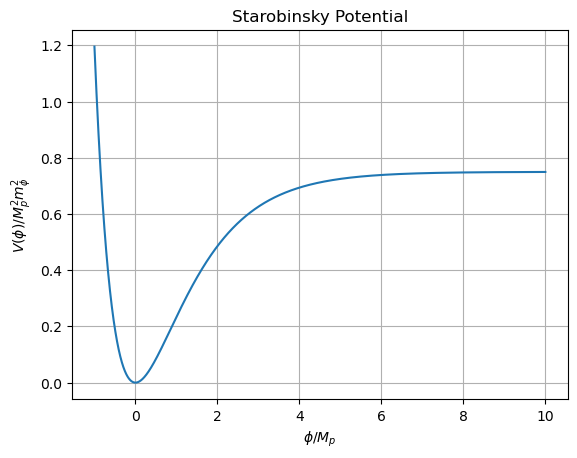

In [228]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d




phi=np.linspace(-1,10,100000)
V= 0.75*(1 - np.exp(-np.sqrt(2/3) * phi))**2




plt.plot(phi, V)
plt.xlabel(r'$\phi/M_p$')
plt.ylabel(r'$V(\phi)/M_p ^2 m_\phi ^2$')
plt.title('Starobinsky Potential')
plt.grid(True)
plt.show()

# Proper time solutions

## Initial conditions

$$A_s = 2.099 \cdot 10^{-9}$$


$$n_s = 0.9649$$

$$\frac{\dot{a}}{a} = \sqrt{\frac{1}{3} \left( {\frac{1}{2}\dot{\phi}}^2 +  V(\phi)\right)}   \;  \text{Friedmann}$$ 

$$\ddot{\phi} = -3 \left( \frac{\dot{a}}{a} \right) \dot{\phi} - V'(\phi) \;  \text{Klein Gordon}
$$

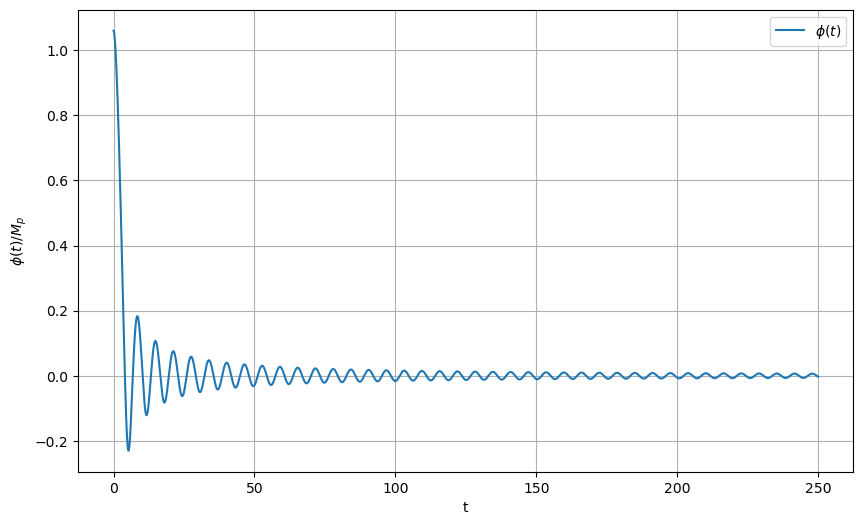

In [229]:
def V(phi):
    return 0.75*(1 - np.exp(-np.sqrt(2/3) * phi))**2

def Vp(phi):
    return 1.22*(np.exp(-np.sqrt(2/3) * phi)-np.exp(-np.sqrt(2/3) * phi*2))



def f(y, t):
    phi, a, phi_prime = y
    a_prime = np.sqrt(1/3 * (0.5*phi_prime**2 + V(phi)))* a  
    phi_double_prime = -3 * (a_prime/a) * phi_prime - Vp(phi)
    return [phi_prime, a_prime, phi_double_prime]

# Condições iniciais
phi0 = 1.06
a0 = 1.0
phi_prime0 = -5.4*10**(-9)
initial_conditions = [phi0, a0, phi_prime0]

# Parâmetros de tempo
t0 = 0.0
tf = 250
t = np.linspace(t0, tf, 100000)  


solution = odeint(f, initial_conditions, t)


phi_values = solution[:, 0]
a_values = solution[:, 1]
phi_prime_values = solution[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(t, phi_values, label=r'$\phi(t)$')
#plt.plot(t, a_values, label='a(t)')
plt.xlabel('t')
plt.ylabel(r'$\phi(t)/M_p$')
plt.legend()
plt.grid(True)
plt.show()


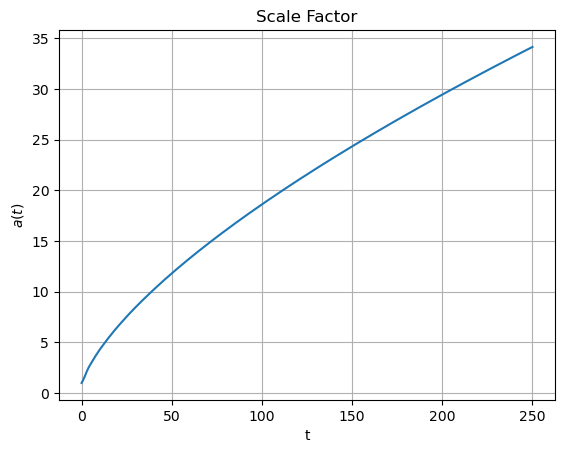

In [230]:
plt.plot(t, a_values, label=r'$\phi(t)$')
plt.title('Scale Factor')
plt.xlabel('t')
plt.ylabel(r'$a(t)$')

plt.grid(True)
plt.show()


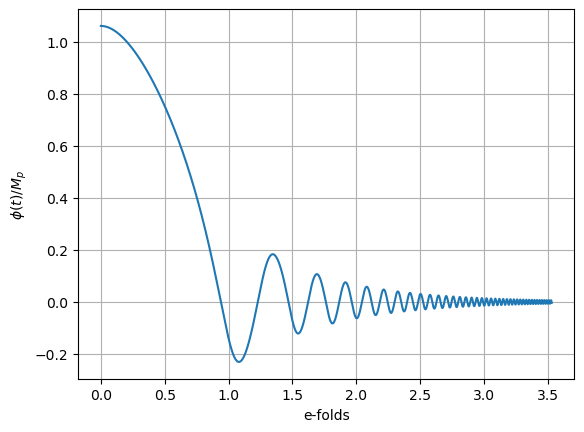

In [231]:
efold= np.log(a_values)

plt.plot(efold, phi_values, label=r'$\phi(t)$')
plt.xlabel('e-folds')
plt.ylabel(r'$\phi(t)/M_p$')

plt.grid(True)
plt.show()


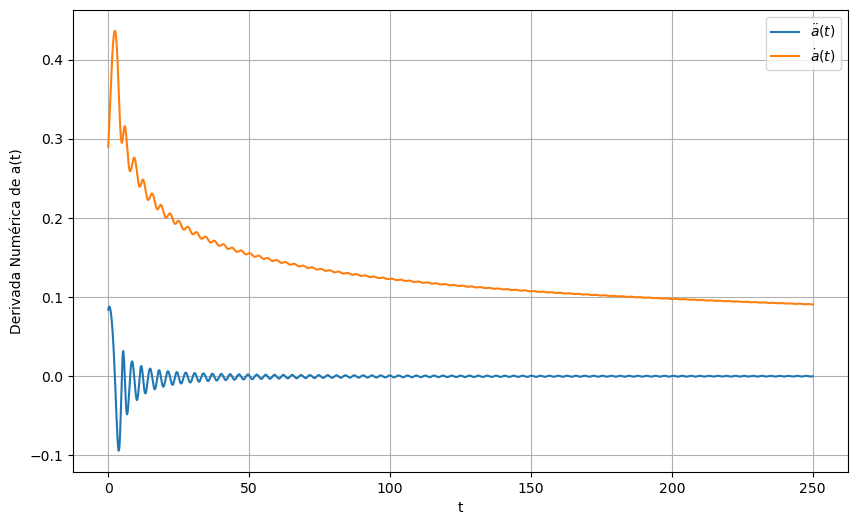

0.2896814585605977


In [232]:
t_derivative = t[:-1]
t2 = t_derivative[:-1]

a_derivative = np.diff(a_values) / np.diff(t)
a_derivative2 = np.diff(a_derivative) / np.diff(t_derivative)
# A derivada numérica terá um ponto a menos que a_values e t


plt.figure(figsize=(10, 6))
plt.plot(t2, a_derivative2, label=r'$\ddot a(t)$')
plt.plot(t_derivative, a_derivative, label=r'$\dot a(t)$')
plt.xlabel('t')
plt.ylabel('Derivada Numérica de a(t)')
plt.legend()
plt.grid(True)
plt.show()

api = a_derivative[0]
print(api)

$$R = 6\left(\frac{\ddot{a}}{a} + \frac{\dot{a}^2}{a^2}\right)$$

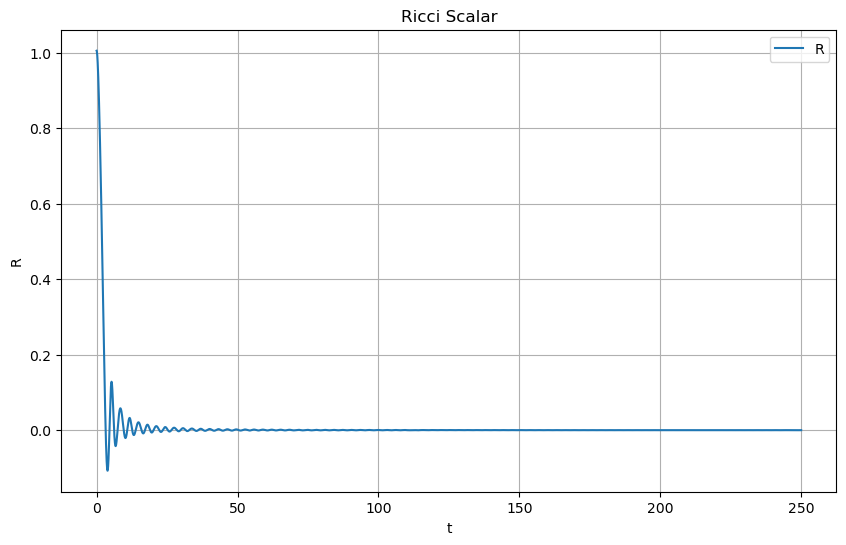

In [233]:
R = 6*((a_derivative2/a_values[2:])+ (a_derivative[1:]/a_values[2:])**2)
plt.figure(figsize=(10, 6))
plt.plot(t2, R, label='R')
plt.title('Ricci Scalar')
plt.xlabel('t')
plt.ylabel('R')
plt.legend()
plt.grid(True)
plt.show()


In [235]:
from scipy.interpolate import interp1d


a_i = interp1d(t2, a_values[2:])
ap_i = interp1d(t2, a_derivative[1:])
R_i = interp1d(t2, R)




# Particle production (proper time)


$$\ddot{\chi} + 3H \dot{\chi} +\omega^2 \chi = 0$$

$$\omega^2 = \frac{k^2}{a^2} + m_\chi + \xi R$$


#### Condições iniciais

$$\chi^{(i)}_k = \frac{1}{\sqrt{2k}}$$

$$\dot{\chi}^{(i)}_k = -\frac{\dot{a}^{(i)}}{\sqrt{2k}} - i\sqrt{\frac{k}{2}}$$

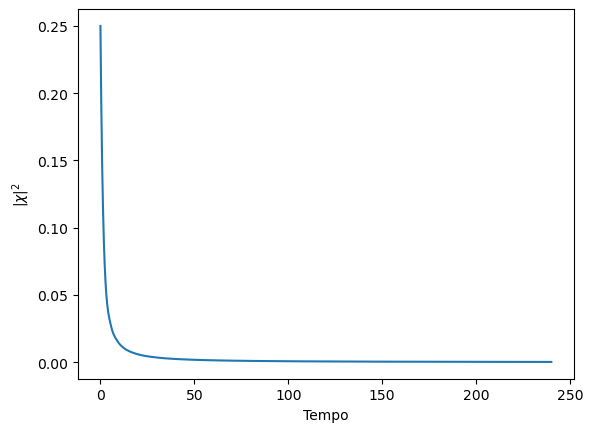

In [236]:

def differential_equation(chi, t, omega, H, R_i, a_i):
    chi1_real, chi1_imag, chi2_real, chi2_imag = chi
    dchi1_real_dt = chi2_real
    dchi2_real_dt = -3*H(t)*chi2_real - omega(t)**2 * chi1_real
    dchi1_imag_dt = chi2_imag
    dchi2_imag_dt = -3*H(t)*chi2_imag -omega(t)**2 * chi1_imag
    return [dchi1_real_dt, dchi1_imag_dt, dchi2_real_dt, dchi2_imag_dt]


def omega(t):
    k = 2
    mx = 0.01
    xi = 11/60
    return np.sqrt((k ** 2)/(a_i(t)**2) +  mx ** 2 + xi* R_i(t))

def H(t):
    
    return ap_i(t)/a_i(t)

#Condições iniciais complexas
k = 2
chi0 = [1/(np.sqrt(2*k) ) , 0.0, -api/(np.sqrt(2*k)) , -np.sqrt(k/2) ]  # chi(0) = 1 + 0j e chi'(0) = 0 + 1j

#intervalo de tempo
t = np.linspace(t0, 240, 10000) 


result = odeint(differential_equation, chi0, t, args=(omega,H,R_i,a_i))

# Resultado
chi1_real, chi1_imag, chi2_real, chi2_imag = result[:, 0], result[:, 1], result[:, 2], result[:, 3]




chiquad = np.abs(chi1_real + 1j*chi1_imag)**2
chidquad2 = np.abs(chi2_real + 1j*chi2_imag)**2

plt.plot(t, chiquad)
plt.xlabel('Tempo')
plt.ylabel(r'$|\chi|^2$')
plt.show()



$$|\beta_k|^2 = \frac{1}{2\omega_k}|a \dot{a} \chi_k + a^2 \dot{\chi_k} |^2 + \frac{\omega_k}{2} | a \chi_k|^2 - 1/2 $$

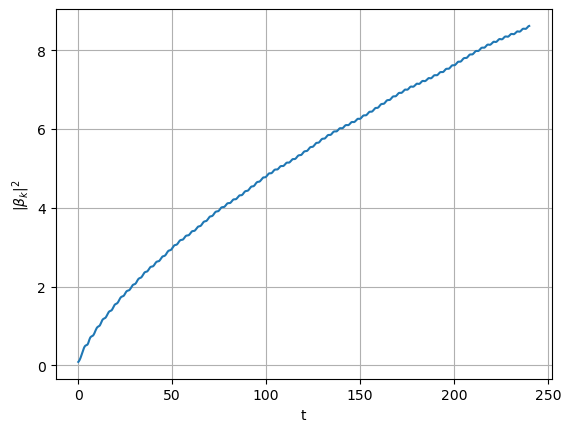

In [237]:
w=omega(t)
chi1= np.sqrt(chiquad)
chip= np.sqrt(chidquad2)

beta= (np.abs(a_i(t)*ap_i(t)*chi1 + (a_i(t)**2)*chip)**2)/(2*w) + ((w*np.abs(a_i(t)*chi1)**2)/2) -1/2


#betateste= beta/a_i(t)

plt.plot(t, beta)
plt.xlabel('t')
plt.ylabel(r'$|\beta_k|^2$')

plt.grid(True)
plt.show()


#não é encontrado o mesmo comportamento do tempo conforme

# Conformal time solutions

## Initial conditions

$$A_s = 2.099 \cdot 10^{-9}$$


$$n_s = 0.9649$$

$$\frac{a'}{a} = \sqrt{\frac{1}{3} \left( {\frac{1}{2}\phi'}^2 + a^2 V(\phi)\right)}   \;  \text{Friedmann}$$ 

$$ \phi '' = -2 \left( \frac{a'}{a} \right) {\phi'} - a^2 V'(\phi) \;  \text{Klein Gordon}
$$

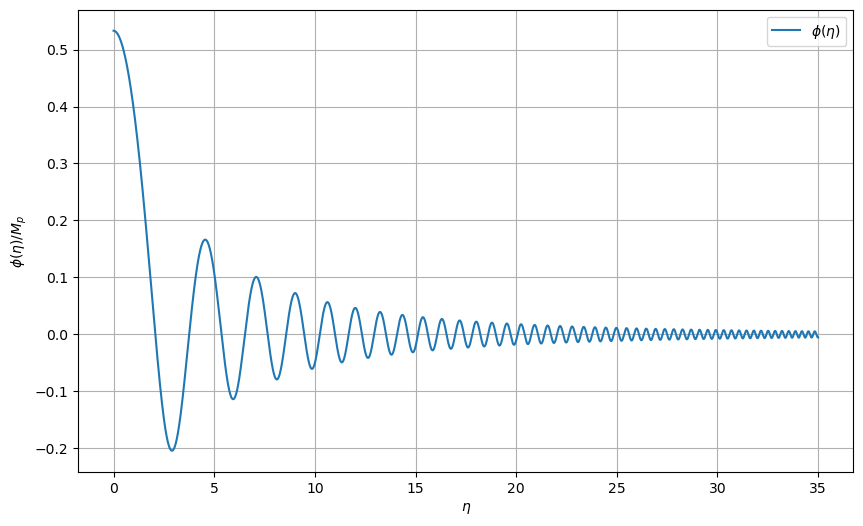

In [238]:
def V(phi):
    return 0.75*(1 - np.exp(-np.sqrt(2/3) * phi))**2

def Vp(phi):
    return 1.22*(np.exp(-np.sqrt(2/3) * phi)-np.exp(-np.sqrt(2/3) * phi*2))

def f(y, t):
    phi, a, phi_prime = y
    a_prime = np.sqrt(1/3 * (0.5*phi_prime**2 + (a**2)*V(phi))) * a  
    phi_double_prime = -2 * (a_prime/a) * phi_prime - (a**2)*Vp(phi)
    return [phi_prime, a_prime, phi_double_prime]

# Condições iniciais
phi0 = 0.533
a0 = 1.0
phi_prime0 = -4.5*10**(-8)
initial_conditions = [phi0, a0, phi_prime0]

# Parâmetros de tempo
t0 = 0.0
tf = 35
t = np.linspace(t0, tf, 100000)  


solution = odeint(f, initial_conditions, t)



phi_values = solution[:, 0]
a_values = solution[:, 1]
phi_prime_values = solution[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(t, phi_values, label=r'$\phi(\eta)$')
#plt.plot(t, a_values, label='a(t)')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi(\eta)/M_p$')
plt.legend()
plt.grid(True)
plt.show()


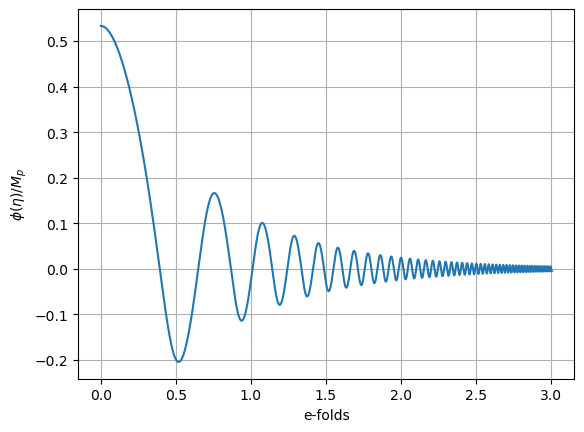

In [239]:
efold= np.log(a_values)

plt.plot(efold, phi_values, label=r'$\phi(t)$')
plt.xlabel('e-folds')
plt.ylabel(r'$\phi(\eta)/M_p$')

plt.grid(True)
plt.show()

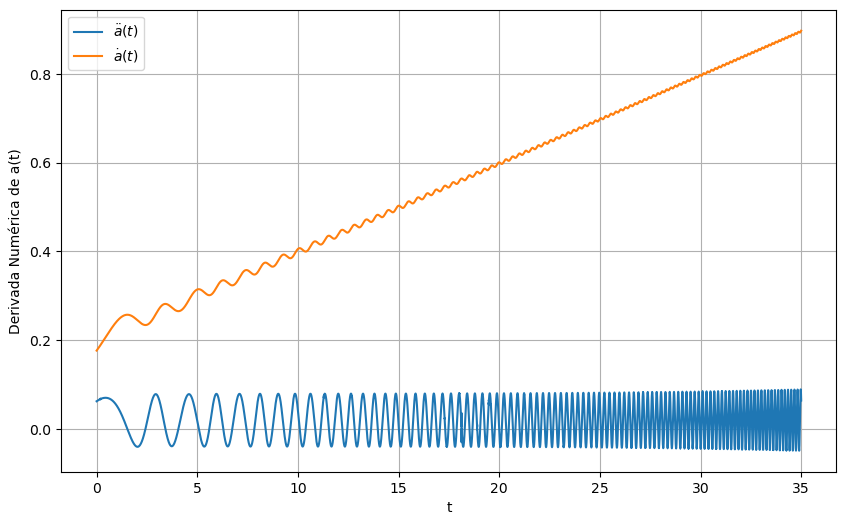

In [240]:
t_derivative = t[:-1]
t2 = t_derivative[:-1]


a_derivative = np.diff(a_values) / np.diff(t)
a_derivative2 = np.diff(a_derivative) / np.diff(t_derivative)
# A derivada numérica terá um ponto a menos que a_values e t


plt.figure(figsize=(10, 6))
plt.plot(t2, a_derivative2, label=r'$\ddot a(t)$')
plt.plot(t_derivative, a_derivative, label=r'$\dot a(t)$')
plt.xlabel('t')
plt.ylabel('Derivada Numérica de a(t)')
plt.legend()
plt.grid(True)
plt.show()

$$R = 6\left(\frac{a''}{a^3}\right)$$

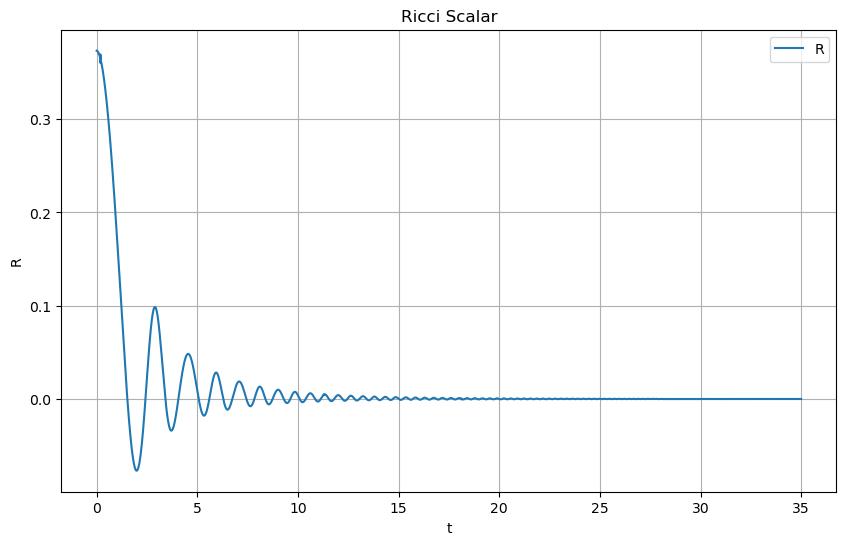

In [241]:
R = 6*(a_derivative2/a_values[2:]**3)
plt.figure(figsize=(10, 6))
plt.plot(t2, R, label='R')
plt.title('Ricci Scalar')
plt.xlabel('t')
plt.ylabel('R')
plt.legend()
plt.grid(True)
plt.show()




In [242]:

a_i = interp1d(t2, a_values[2:])
ap_i = interp1d(t2, a_derivative[1:])
R_i = interp1d(t2, R)


# Particle production (conformal time)


$$\chi'' +\omega^2 \chi = 0$$

$$\omega^2 = k^2 + a^2 m_\chi + \left(\xi - \frac{1}{6}\right)a^2 R$$


#### Condições iniciais

$$\chi^{(i)}_k = \frac{1}{\sqrt{2k}}$$

$$\chi'^{(i)}_k =  - i\sqrt{\frac{k}{2}}$$

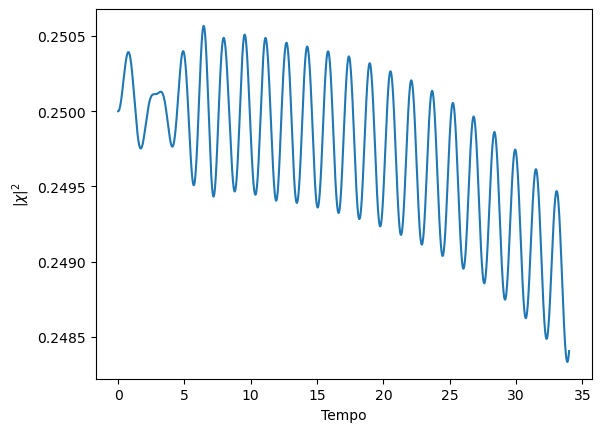

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def differential_equation(chi, t, omega, R_i, a_i):
    chi1_real, chi1_imag, chi2_real, chi2_imag = chi
    dchi1_real_dt = chi2_real
    dchi2_real_dt = -omega(t)**2 * chi1_real
    dchi1_imag_dt = chi2_imag
    dchi2_imag_dt = -omega(t)**2 * chi1_imag
    return [dchi1_real_dt, dchi1_imag_dt, dchi2_real_dt, dchi2_imag_dt]

def omega(t):
    k = 2
    mx = 0.01
    xi = 11/60
    return np.sqrt(k ** 2 + (a_i(t) ** 2) * mx ** 2 - (a_i(t)**2)*(xi - 1 / 6) * R_i(t))


#condição inicial
k = 2
chi0 = [1/(np.sqrt(2*k) ) , 0.0, 0.0, -np.sqrt(k/2) ]  # chi(0) = 1 + 0j e chi'(0) = 0 + 1j


t = np.linspace(t0, 34, 100000) 


result = odeint(differential_equation, chi0, t, args=(omega,R_i,a_i))

# Resultado
chi1_real, chi1_imag, chi2_real, chi2_imag = result[:, 0], result[:, 1], result[:, 2], result[:, 3]



chiquad = np.abs(chi1_real + 1j*chi1_imag)**2
chiquad2 = np.abs(chi2_real + 1j*chi2_imag)**2

plt.plot(t, chiquad)
plt.xlabel('Tempo')
plt.ylabel(r'$|\chi|^2$')
plt.show()


$$|\beta_k|^2 = \frac{1}{2\omega_k}|\chi_k ^{'} |^2 + \frac{\omega_k}{2} |\chi_k|^2 - 1/2 $$

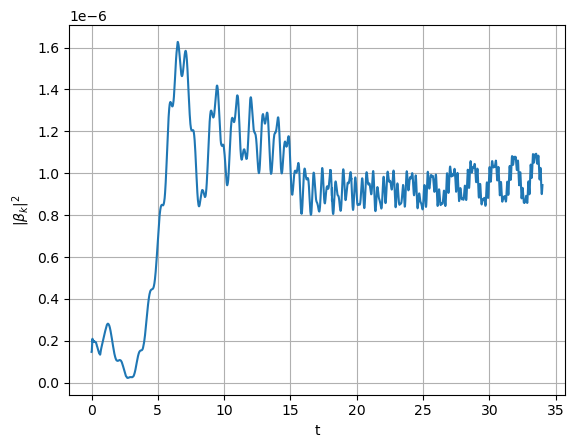

In [244]:
w=omega(t)

beta= chiquad2/(2*w) + (w*chiquad/2) -1/2

plt.plot(t, beta)
plt.xlabel('t')
plt.ylabel(r'$|\beta_k|^2$')
#plt.legend()
plt.grid(True)
plt.show()